1. 1차원데이터분석

1. 변수종류파악( 수치형/ 범주형/ 시간형)

2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

3. 시각화

도수분포표/ 히스토그램/ 상자그림
2. 2차원데이터분석

1. 공분산/ 상관계수

2. 다중공선성확인

3. 시각화

산점도/ 회귀직선/ 히트맵
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

# 항공사 지연요인 데이터 탐색적 분석

In [1]:
import pandas as pd

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
#한글폰트 검색
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') != -1:
        print(i.name)

Gulim
New Gulim


In [80]:
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./data/airline_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


데이터 정보를 보면 'airline'은 결측값이 없고, 수치형 변수들은 결측치가 28개씩 존재함을 알 수 있다.

범주형 변수 : airline <br>
수치형 변수 : pct_carrier_delay, pct_atc_delay, pct_weather_delay

In [3]:
df.select_dtypes(include='number').head()   #수치형 변수 뽑아내기

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


수치형 변수의 최대/최소/대표값 확인

In [4]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


범주형 변수의 값 목록 확인

In [5]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

항공사별 기술통계 비교

In [6]:
df.groupby('airline').describe().T   #.T를 하게 되면 표에 역을 취함

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

In [28]:
import seaborn as sns
#%matplotlib inline
import matplotlib.pyplot as plt

시각적 분석 <br>
- 히스토그램

Text(0.5, 1.0, 'pct_weather_delay')

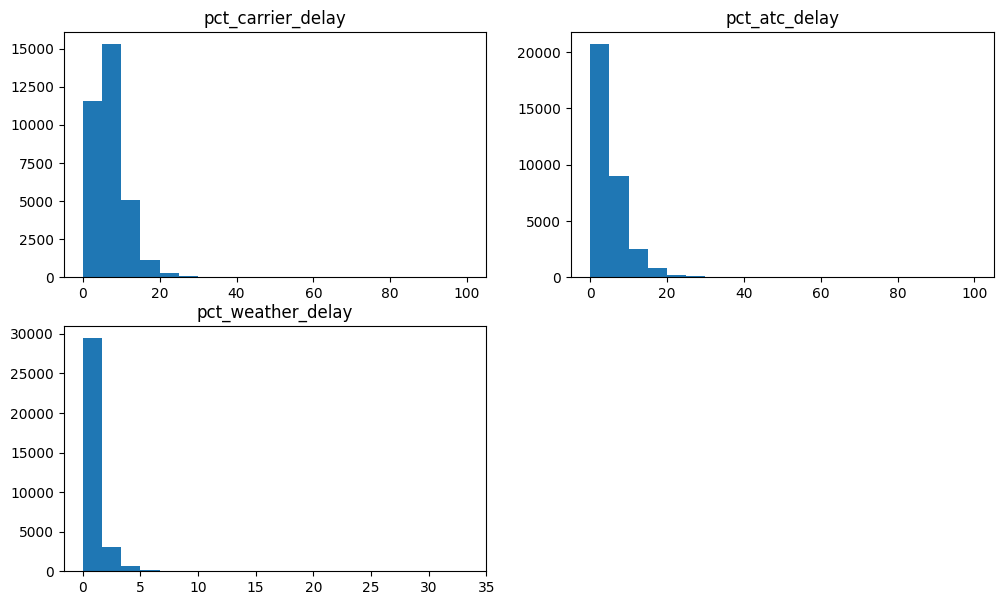

In [16]:
#수치형 변수들의 히스토그램
fig = plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.hist(data=df, x='pct_carrier_delay', bins=20)
plt.title('pct_carrier_delay')
plt.subplot(2,2,2)
plt.hist(data=df, x='pct_atc_delay', bins=20)
plt.title('pct_atc_delay')
plt.subplot(2,2,3)
plt.hist(data=df, x='pct_weather_delay', bins=20)
plt.title('pct_weather_delay')

'pct_carrier_delay'와 'pct_atc_delay'는 0~20% 구간에 몰려있고, 'pct_weather_delay'는 5% 이하에 몰려있음을 알 수 있다. <br>

시각적 분석
- 박스플롯 (수치형 변수)
- 28개의 결측치 제거

C:\Users\Admin\AppData\Local\Temp\ipykernel_15592\100213195.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes.boxplot(


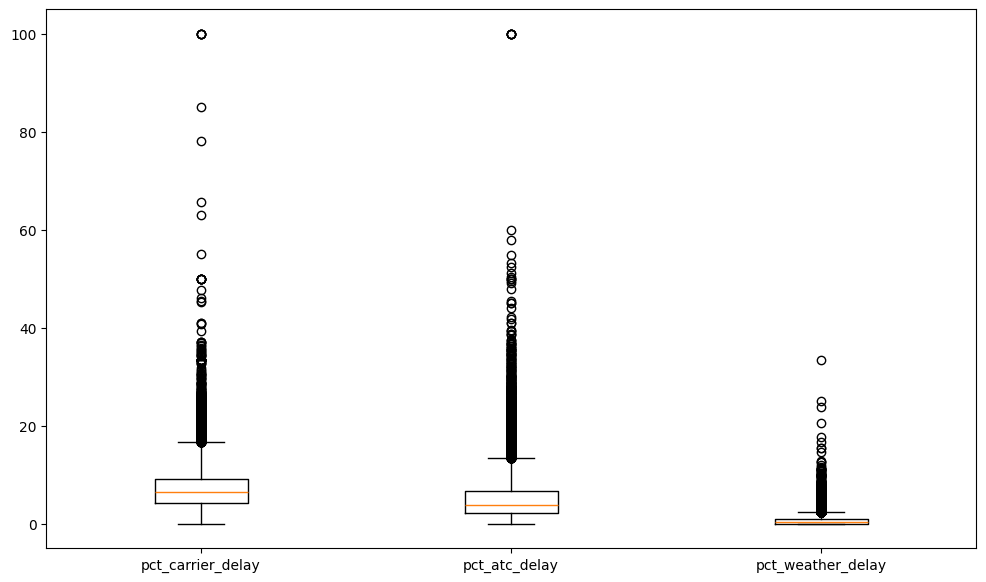

In [30]:
#수치형 변수들의 박스플롯
fig = plt.figure(figsize=(12,7))
axes = fig.add_subplot(1,1,1)

axes.boxplot(
             x=[
                 df['pct_carrier_delay'].dropna(),
                 df['pct_atc_delay'].dropna(),
                 df['pct_weather_delay'].dropna()
             ],
             labels=['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay'])
plt.show()

<박스플롯 결과 분석> <br>
최댓값, 최솟값, 중앙값 모두 pct_carrier_delay > pct_atc_delay > pct_weather_delay 순으로 <br>
항공사 내부로 인한 지연 비율이 관제나 날씨보다 높게 나타난다.  

시각적 분석
- 박스플롯 (범주형 변수)
- 28개의 결측치 제거

C:\Users\Admin\AppData\Local\Temp\ipykernel_15592\3267719734.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes1.boxplot(


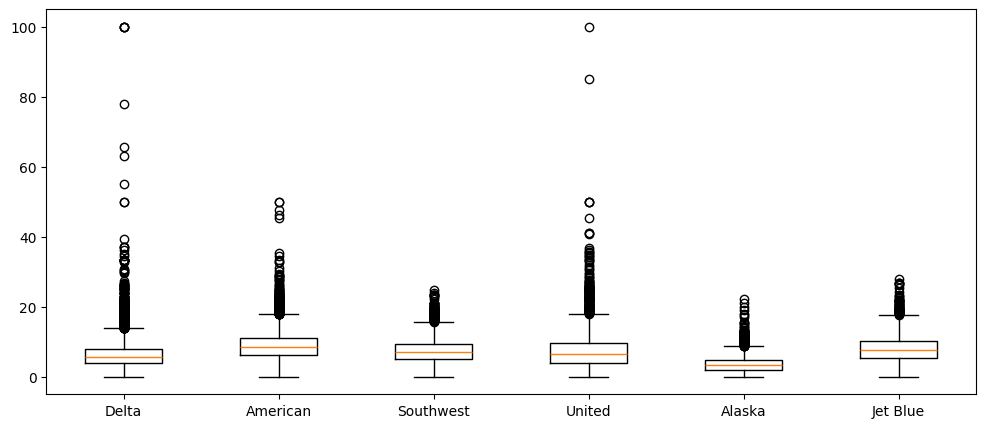

In [35]:
#범주형 변수의 항공사 내부 지연 박스플롯
fig = plt.figure(figsize=(12,5))
axes1 = fig.add_subplot(1,1,1)

axes1.boxplot(
    x=[
        df[df['airline'] == 'Delta']['pct_carrier_delay'].dropna(),
        df[df['airline'] == 'American']['pct_carrier_delay'].dropna(),
        df[df['airline'] == 'Southwest']['pct_carrier_delay'].dropna(),
        df[df['airline'] == 'United']['pct_carrier_delay'].dropna(),
        df[df['airline'] == 'Alaska']['pct_carrier_delay'].dropna(),
        df[df['airline'] == 'Jet Blue']['pct_carrier_delay'].dropna()
    ],
    labels=['Delta', 'American', 'Southwest', 'United', 'Alaska', 'Jet Blue']
)
plt.show()

<박스플롯 결과 분석> <br>
최댓값, 최솟값, 중앙값 모두 항공사마다 크게 차이나지 않는다. <br>
그러나 Delta 항공사와 United 항공사의 이상치가 위에 많이 넓게 분포되어 있으므로 <br>
다른 항공사들에 비해 심한 내부 지연이 있었음을 알 수 있다.

C:\Users\Admin\AppData\Local\Temp\ipykernel_15592\3744173072.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes2.boxplot(


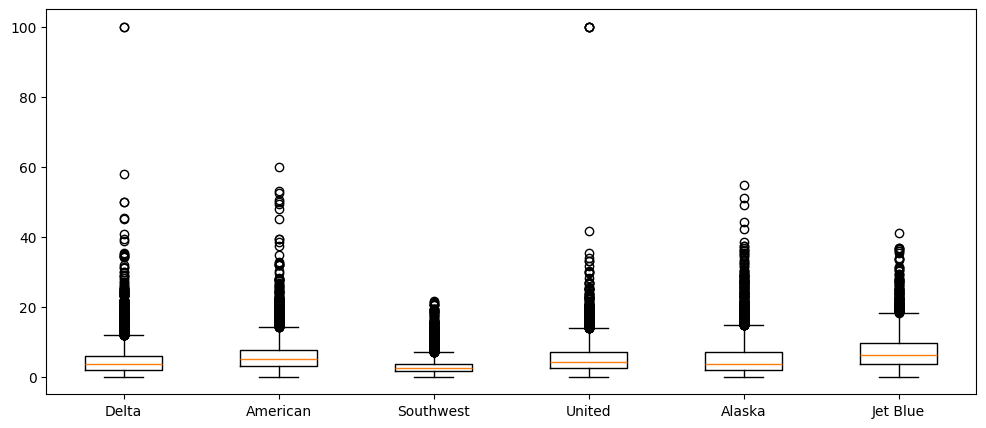

In [36]:
#범주형 변수의 관제 지연 박스플롯
fig = plt.figure(figsize=(12,5))
axes2 = fig.add_subplot(1,1,1)

axes2.boxplot(
    x=[
        df[df['airline'] == 'Delta']['pct_atc_delay'].dropna(),
        df[df['airline'] == 'American']['pct_atc_delay'].dropna(),
        df[df['airline'] == 'Southwest']['pct_atc_delay'].dropna(),
        df[df['airline'] == 'United']['pct_atc_delay'].dropna(),
        df[df['airline'] == 'Alaska']['pct_atc_delay'].dropna(),
        df[df['airline'] == 'Jet Blue']['pct_atc_delay'].dropna()
    ],
    labels=['Delta', 'American', 'Southwest', 'United', 'Alaska', 'Jet Blue']
)
plt.show()

<박스플롯 결과 분석> <br>
최댓값, 최솟값, 중앙값 모두 항공사마다 크게 차이나지 않는다. <br>
Delta 항공사와 United 항공사는 항공사 내부 지연과 비슷한 분포를 따라가고 <br>
American 항공사와 Alaska항공사, Jet Blue 항공사는 항공사 내부 지연보다 이상치가 높게 분포되어 있으므로 이 세 항공사는 내부 지연보다 관제로 인한 지연이 더 많음을 예상할 수 있다.

C:\Users\Admin\AppData\Local\Temp\ipykernel_15592\2512000642.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes3.boxplot(


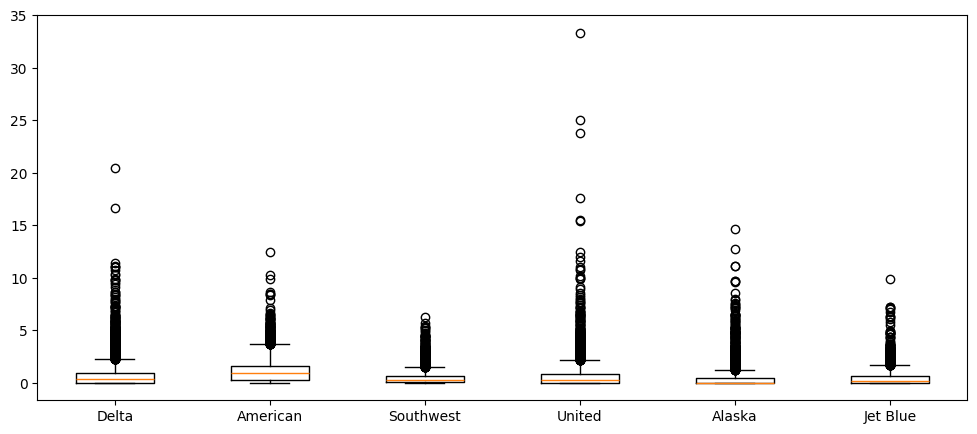

In [37]:
#범주형 변수의 날씨 지연 박스플롯
fig = plt.figure(figsize=(12,5))
axes3 = fig.add_subplot(1,1,1)

axes3.boxplot(
    x=[
        df[df['airline'] == 'Delta']['pct_weather_delay'].dropna(),
        df[df['airline'] == 'American']['pct_weather_delay'].dropna(),
        df[df['airline'] == 'Southwest']['pct_weather_delay'].dropna(),
        df[df['airline'] == 'United']['pct_weather_delay'].dropna(),
        df[df['airline'] == 'Alaska']['pct_weather_delay'].dropna(),
        df[df['airline'] == 'Jet Blue']['pct_weather_delay'].dropna()
    ],
    labels=['Delta', 'American', 'Southwest', 'United', 'Alaska', 'Jet Blue']
)
plt.show()

<박스플롯 결과 분석> <br>
최댓값, 최솟값, 중앙값 모두 항공사마다 크게 차이나지 않는다. <br>
날씨로 인한 지연 최댓값이 약 33%이므로 항공사 내부 지연과 관제 지연보다 지연될 확률이 적음을 알 수 있다.<br>
IQR 크기가 항공사 내부 지연과 관제 지연에 비해 가장 작으므로 데이터가 변동이 적으므로 안정적이라고 해석할 수 있다.

시각적 분석
- Scatter (수치형 변수)
- 28개의 결측치 제거

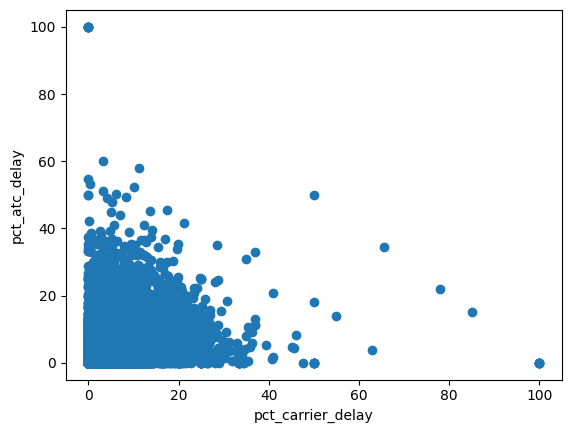

In [44]:
#항공사 내부 지연과 관제 지연 간의 관계
fig = plt.figure()
axes4 = fig.add_subplot(1,1,1)

axes4.scatter(
    df['pct_carrier_delay'].dropna(), df['pct_atc_delay'].dropna()
)
plt.xlabel('pct_carrier_delay')
plt.ylabel('pct_atc_delay')
plt.show()

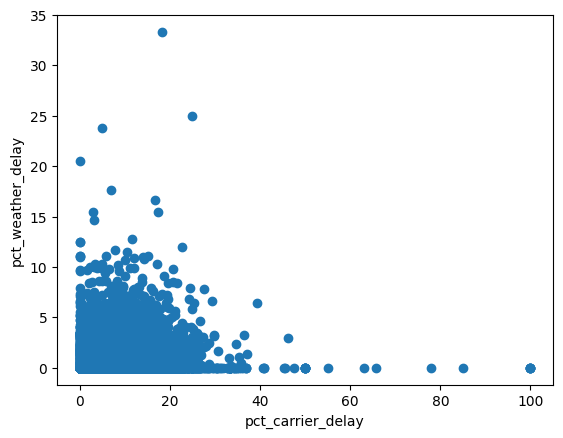

In [48]:
#항공사 내부 지연과 날씨 지연 간의 관계
fig = plt.figure()
axes5 = fig.add_subplot(1,1,1)

axes5.scatter(
    df['pct_carrier_delay'].dropna(), df['pct_weather_delay'].dropna()
)
plt.xlabel('pct_carrier_delay')
plt.ylabel('pct_weather_delay')
plt.show()

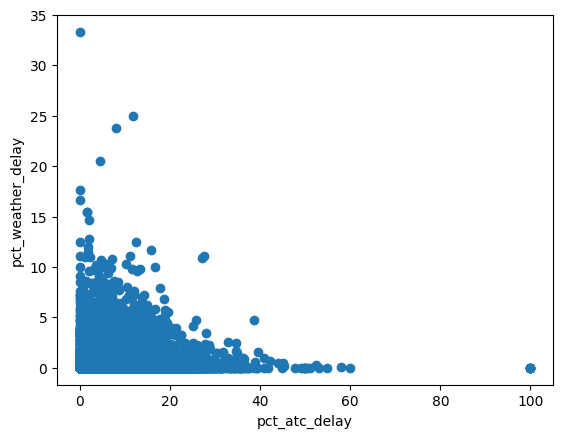

In [50]:
#관제 지연과 날씨 지연 간의 관계
fig = plt.figure()
axes6 = fig.add_subplot(1,1,1)

axes6.scatter(
    df['pct_atc_delay'].dropna(), df['pct_weather_delay'].dropna()
)
plt.xlabel('pct_atc_delay')
plt.ylabel('pct_weather_delay')
plt.show()

<산점도 결과 분석> <br>
세 그림 모두 (0,0)쪽으로 몰려있으므로 모두의 영향을 다 받는 지연은 거의 없는 것으로 예측할 수 있다. <br>
상관관계가 없어 보인다.

In [52]:
#컬럼의 평균으로 결측값 채우기
df_mean = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_mean[col] = df_mean[col].fillna(df_mean[col].mean())

In [54]:
#상관계수 구하기
corr_matrix = df_mean[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()
print(corr_matrix)

                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay           1.000000       0.144474           0.161474
pct_atc_delay               0.144474       1.000000           0.091729
pct_weather_delay           0.161474       0.091729           1.000000


corr()함수를 사용하여 상관계수를 구한 결과 세 변수 모두 양의 상관관계이지만 0에 가까우므로 <br>
"상관없음"이라고 판단할 수 있다.

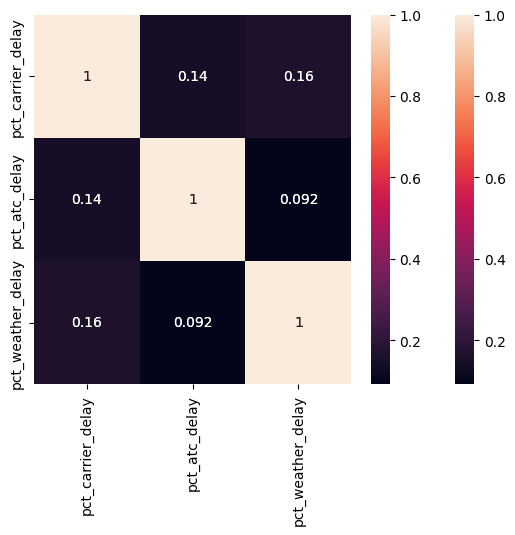

In [56]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

상관계수를 히트맵으로도 본 결과 각 변수들 간의 색상이 매우 어두으므로 각 변수들 간 "상관없음"이라고 판단할 수 있다.

In [60]:
#항공사별 평균 내부 지연률 구하기
carrier_delay_airline = df_mean.groupby('airline')['pct_carrier_delay'].mean()
print(carrier_delay_airline)

airline
Alaska       3.521889
American     9.041481
Delta        6.334393
Jet Blue     8.081292
Southwest    7.521997
United       7.398043
Name: pct_carrier_delay, dtype: float64


In [61]:
#항공사별 평균 관제 지연률 구하기
atc_delay_airline = df_mean.groupby('airline')['pct_atc_delay'].mean()
print(atc_delay_airline)

airline
Alaska       5.472672
American     5.993213
Delta        4.463804
Jet Blue     7.344036
Southwest    3.147019
United       5.347562
Name: pct_atc_delay, dtype: float64


In [62]:
#항공사별 평균 날씨 지연률 구하기
weather_delay_airline = df_mean.groupby('airline')['pct_weather_delay'].mean()
print(weather_delay_airline)

airline
Alaska       0.513497
American     1.122767
Delta        0.680770
Jet Blue     0.465443
Southwest    0.512611
United       0.680706
Name: pct_weather_delay, dtype: float64


In [68]:
#평균 지연률을 하나의 데이터 프레임으로 합치기
delay_df = pd.DataFrame({
    'carrier_delay': carrier_delay_airline,
    'atc_delay': atc_delay_airline,
    'weather_delay': weather_delay_airline
})

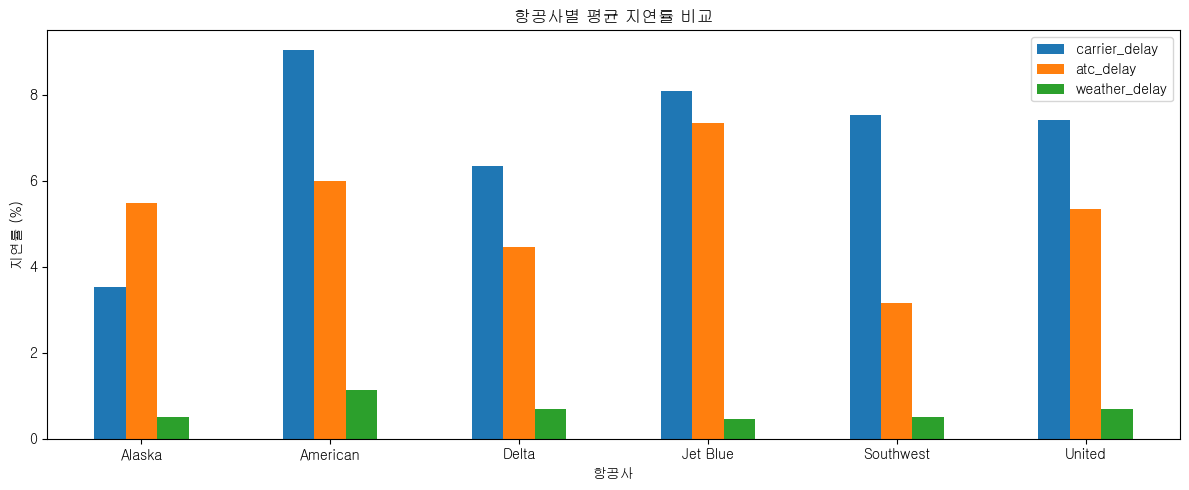

In [81]:
delay_df.plot(kind='bar', figsize=(12,5))
plt.title('항공사별 평균 지연률 비교')
plt.xlabel('항공사')
plt.ylabel('지연률 (%)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

항공사별 평균 지연률을 비교하니 모든 항공사마다 